# Twitter Workbook

# Twitter Sentiment Analysis

This notebook aims to predict whether a person does or does not intend to get the COVID-19 vaccine by looking at Tweets.

## Libraries

In [81]:
import tweepy
import webbrowser
import time

import pandas as pd

from tweepy import OAuthHandler
from tweepy import API

import config

import matplotlib.pyplot as plt

# auth.set_access_token(access_token, access_token_secret)



In [ ]:
callback_uri = 'oob'

In [ ]:
auth = OAuthHandler(config.consumer_key, config.consumer_secret, callback_uri)
auth.set_access_token(config.access_token, config.access_token_secret)
# redirect_url = auth.get_authorization_url()

In [ ]:
# webbrowser.open(redirect_url)

In [ ]:
# user_pin_input = input("What's the pin value? ")

In [ ]:
# auth.get_access_token(user_pin_input)

In [ ]:
api = API(auth, wait_on_rate_limit= True)

In [ ]:
me = api.me()
print(me.screen_name)

get text from your timeline into pandas

In [ ]:
my_timeline = api.home_timeline()

In [ ]:
print(my_timeline)

In [ ]:
columns = set()
allowed_types = [str, int]
tweet_data = []

for status in my_timeline:
#     print(status.text)
#     print (type(vas(status)))
    status_dict = dict(vars(status))
    keys = status_dict.keys()
    single_tweet_data = {}
    for k in keys:
        try:
            v_type = type(status_dict['k'])
        except:
            v_type = None
            
        if v_type != None:
            if v_type in allowed_types:
                single_tweet_data[k] = status_dict[k]
                columns.add(k)
    tweets_data.append(single_tweet_data )
        
header_cols = list(columns)

In [ ]:
df = pd.DataFrame(tweet_data, columns= header_cols)
df.head()

In [ ]:
#. get_status?

user = api.get_user('code')
user_timeline = user.timeline()
df2 = extract_timeline_as_df(user_timeline)
df2.head()

In [ ]:
def extract_timeline_as_df(timeline_list):
    columns = set()
    allowed_types = [str, int]
    tweets_data = []
    for status in timeline_list:
        status_dict = dict(vars(status))
        keys = status_dict.keys()
        single_tweet_data = {"user": status.user.screen_name, "author": status.author.screen_name}
        for k in keys:
            try:
                v_type = type(status_dict[k])
            except:
                v_type = None
            if v_type != None:
                if v_type in allowed_types:
                    single_tweet_data[k] = status_dict[k]
                    columns.add(k)
        tweets_data.append(single_tweet_data)


    header_cols = list(columns)
    header_cols.append('author')
    df = pd.DataFrame(tweets_data, columns=header_cols)
    return df

In [ ]:
df3 = extract_timeline_as_df(user_timeline)

In [ ]:
df3.head()

In [ ]:
status_obj = api.get_status('1247966976951058433')
status_obj.text

In [ ]:
print(status_obj.geo)

In [ ]:
len(api.home_timeline())

In [ ]:
other_user = 'therock'
for i, status in enumerate(tweepy.Cursor(api.user_timeline, screen_name = other_user).items(20)):
    print (i, status.text)

In [ ]:
api.

In [ ]:
# query = '#vaccine'
# api.search(q = query)

In [ ]:
query = '#vaccine covid'
for i, status in enumerate(tweepy.Cursor(api.search, q= query).items(50)):
    print (i, status.text)

In [ ]:
cursor = tweepy.Cursor(api.user_timeline, id= 'code', tweet_mode = 'extended').items(1)

In [ ]:
for i in cursor:
    print(dir(i))

In [ ]:
cursor = tweepy.Cursor(api.user_timeline, id= 'code', tweet_mode = 'extended').items(1)

In [ ]:
for i in cursor:
    print(i.full_text, i.lang, i.geo)

In [ ]:
cursor = tweepy.Cursor(api.search, q= 'vaccine', tweet_mode = 'extended').items(6)

In [ ]:
for i in cursor:
    print(i.full_text, i.lang, i.geo)

In [ ]:
number_of_tweets = 50
tweets = []
language = []
time = []

for i in tweepy.Cursor(api.search, q= 'vaccine covid -RT',  tweet_mode = 'extended', include_rts= False).items(number_of_tweets):
    tweets.append(i.full_text)
    language.append(i.lang)
    time.append(i.created_at)


In [ ]:
df = pd.DataFrame({'time': time, 'language': language, 'tweets': tweets})

In [ ]:
df

In [ ]:
df = df[~df.tweets.str.contains('RT')]

In [ ]:
df.reset_index(drop= True, inplace= True)

In [ ]:
df.to_csv('tweets.csv', mode= 'a', index= False, header= False)

In [ ]:
df2 = pd.read_csv('tweets.csv')
df2

In [ ]:
number_of_tweets = 5
tweets = []
language = []
time = []

for i in tweepy.Cursor(api.search, q= 'vaccine covid -RT',  tweet_mode = 'extended', include_rts= False).items(number_of_tweets):
    tweets.append(i.full_text)
    language.append(i.lang)
    time.append(i.created_at)

In [ ]:
df3 = pd.DataFrame({'time': time, 'language': language, 'tweets': tweets})
df3

In [ ]:
df3.to_csv('tweets.csv', index= False)

## Search 30 day tweets

In [ ]:
# function to turn results into DataFrame
def extract_text_as_df(text_list):
    columns = set()
    allowed_types = [str, int]
    tweets_data = []
    for status in text_list:
        status_dict = dict(vars(status))
        keys = status_dict.keys()
        single_tweet_data = {"author": status.author.screen_name}
        for k in keys:
            try:
                v_type = type(status_dict[k])
            except:
                v_type = None
            if v_type != None:
                if v_type in allowed_types:
                    single_tweet_data[k] = status_dict[k]
                    columns.add(k)
        tweets_data.append(single_tweet_data)


    header_cols = list(columns)
    header_cols.append('author')
    df = pd.DataFrame(tweets_data, columns=header_cols)
    return df

In [ ]:
query = 'vaccine covid -RT'
results_30 = api.search_30_day('datacollection', query, maxResults= 10)
# results_30
old_results_df = extract_text_as_df(results_30)
old_results_df

In [ ]:
# pip install googletrans

In [ ]:
df = pd.read_csv('tweets.csv')

In [ ]:
lang_df = df.sort_values('language')

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
plt.figure(figsize= (12, 8))
lang_df.language.value_counts(normalize=True).plot(kind= 'barh')
plt.title('Proportion of Languages Collected')
plt.xlim(-.01, 1)
plt.show()

In [ ]:
lang_df.language.value_counts(normalize=True)

In [ ]:
# what are these languages? get table from url
URL = 'https://developer.twitter.com/en/docs/twitter-for-websites/supported-languages'
tables = pd.read_html(URL)
print("There are : ",len(tables)," tables")
print(tables[0])

lang_table = tables[0]

In [ ]:
# lang_table
header_row = 0
lang_table.columns = lang_table.iloc[header_row]
lang_table = lang_table.drop(header_row)
lang_table.reset_index(drop= True, inplace= True)
lang_table.replace('English (default)', 'English', inplace= True)
lang_table

In [ ]:
lang_table.to_csv('data/languages.csv', index= False)

In [ ]:
duped = df[df.duplicated(subset= 'tweets')]

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
duped

In [ ]:
# remove duplicates
df.drop_duplicates(subset= 'tweets', keep= 'first', inplace= True)
df.reset_index(drop= True, inplace= True)
df.tweets.duplicated().sum()

In [ ]:
df.tweets.duplicated().sum()

In [ ]:
df[df['language'] == 'und']

In [ ]:
df = df[df['language'] != 'und']

In [ ]:
df.info()

In [ ]:
lang_table.columns

In [ ]:
df

In [ ]:
df2 = df.merge(lang_table, how= 'inner', left_on= 'language', right_on= 'Language code')
df2.info()

In [ ]:
df2.drop(columns = ['language', 'Language code'], inplace= True)
df2.rename(columns={'Name': 'language'}, inplace= True)
df2

In [ ]:
df2.rename(columns={'Name': 'language'}, inplace= True)

In [ ]:
df2['time'] = pd.to_datetime(df2['time']).dt.date

In [ ]:
df2

In [ ]:
df2

In [ ]:
import seaborn as sns
sns.set_style('whitegrid')

In [ ]:
# countplot that excludes English to see detail
plt.figure(figsize= (10, 8))
sns.countplot(y= 'language', data= df2, palette='autumn',
              order= df2.language.value_counts().iloc[1:].index)
plt.title('Count of Tweets, Excluding English', fontsize= 14)
plt.xlabel('# of Tweets')
plt.ylabel('Language')
plt.show()

## Text sentiment

In [ ]:
# remove urls? https: http: ...

In [ ]:
# use textblob?

In [ ]:
df2 = pd.read_csv('data/tweets_translated.csv')

In [ ]:
sentiment_df = df2[['time', 'tweets']]

In [ ]:
trial_df = sentiment_df[20:35]

In [ ]:
pd.set_option('display.max_colwidth', None)
trial_df

In [ ]:
from google.oauth2 import service_account
from google.cloud import language

In [ ]:
credentials = service_account.Credentials.from_service_account_file('../GCP_service_account.json')
# translate_client = translate.Client(credentials= credentials)

In [ ]:
# client = language.LanguageServiceClient()
nlp_client = language.Client(credentials = credentials)

### Here is the function

In [ ]:
scores = []
magnitudes = []

def getGoogleSentiments(txt):
    document = nlp_client.document_from_text(txt)
    
    sent_analysis = document.analyze_sentiment()
    sentiment = sent_analysis.sentiment
    
    score = sentiment.score
    scores.append(score)
    magnitude = sentiment.magnitude
    magnitudes.append(magnitude)


### Add time delay

In [ ]:
scores = []
magnitudes = []

def getGoogleSentiments(txt):
    document = nlp_client.document_from_text(txt)

    time.sleep(5)
    print('sleeping 1')
    sent_analysis = document.analyze_sentiment()
    time.sleep(5)
    print('sleeping 2')
    sentiment = sent_analysis.sentiment

    score = sentiment.score
    scores.append(score)
    magnitude = sentiment.magnitude
    magnitudes.append(magnitude)


In [ ]:
trying = trial_df.tweets.apply(getGoogleSentiments)

In [ ]:
nlp_client.document_from_text

In [ ]:
def language_analysis(text):
    document = nlp_client.document_from_text(text)
    
    sent_analysis = document.analyze_sentiment()
#     print(dir(sent_analysis))
    sentiment = sent_analysis.sentiment
    
    ent_analysis = document.analyze_entities()
    entities = ent_analysis.entities
    
#     synt_analysis = document.synt_analysis()
#     syntax = synt_analysis.syntax
    
    return sentiment, entities

In [ ]:
results = {}

# translate tweets into English
for i in trial4_df.tweets.loc[:]:
    
    document = nlp_client.document_from_text(i)
    sent_analysis = document.analyze_sentiment()
    sentiment = sent_analysis.sentiment
    
    score = sentiment.score
    magnitude = sentiment.magnitude
    
    result = translate_client.translate(i, target_language= 'en')
    results[i] = result['translatedText']

In [ ]:
# example_text = 'Is it not obvious that Python is the best programming language of them all?'
# example_text = 'Concerning the use of aborted baby tissue in the J&amp;J Covid vaccine:\n\n“The J&amp;J vaccine has sparked debate among some religious communities because it was developed from stem cells obtained during two abortions decades ago.”\n\nEvil is still evil, even if it was decades ago.'
example_text = '@Kit_Yates_Maths Tests\n1. Vax deployment ✅✅\n2. Vax reduces hospitalisation ✅✅\n3. Infection rates unsubstantiated pressure on NHS ✅\n4. Variants of concern ☑️\n\nSo not measured but very conservative \nhttps://t.co/iVMKF2pPsF https://t.co/ta4t21HH9s'

sentiment, entities = language_analysis(example_text)
print(sentiment.score, sentiment.magnitude)
print()
for e in entities:
    print (e.name, e.entity_type, e.metadata, e.salience)

In [ ]:
trial3_df

In [ ]:
scores = []
magnitudes = []

def getGoogleSentiments(txt):
    document = nlp_client.document_from_text(txt)
    
    sent_analysis = document.analyze_sentiment()
    sentiment = sent_analysis.sentiment
    
    score = sentiment.score
    scores.append(score)
    magnitude = sentiment.magnitude
    magnitudes.append(magnitude)

In [ ]:
trial4_df = sentiment_df[50:65]

In [ ]:
ans4 = trial4_df.tweets.apply(getGoogleSentiments)

In [ ]:
trial4_df['Google Score'] = scores

In [ ]:
trial4_df

In [ ]:
trial4_df.tweets.apply(lambda x: getGoogleSentiments(x))

In [ ]:
res_df

In [ ]:
for i in range(len(trial2_df)):
    print(i)

In [ ]:
#try this one
res_df = pd.DataFrame(columns = ['GoogSc', 'GoogMag'])
df_len = len(trial3_df)
scores = []
magnitudes = []

def getGoogleSentiments(txt):
    document = nlp_client.document_from_text(txt)
    
    sent_analysis = document.analyze_sentiment()
    sentiment = sent_analysis.sentiment
    
    score = sentiment.score
    scores.append(score)
    magnitude = sentiment.magnitude
    magnitudes.append(magnitude)
    
    res_df = [[scores, magnitudes]]
    

In [ ]:
res_df = pd.DataFrame(columns = ['GoogSc', 'GoogMag'])

# translate tweets into English
for i in trial4_df.tweets.loc[:]:
    
    document = nlp_client.document_from_text(i)
    sent_analysis = document.analyze_sentiment()
    sentiment = sent_analysis.sentiment
    
    score = sentiment.score
    magnitude = sentiment.magnitude
    
#     result = translate_client.translate(i, target_language= 'en')
    res_df[i] = [score, magnitude]

In [ ]:
res_df

In [ ]:
trial3_df.tweets.apply(getGoogleSentiments)

In [ ]:
df_len

In [ ]:
res_df

In [ ]:
trial3_df.merge(res_df, left_on= 'tweet', right_on= res_df.index)

In [ ]:
def getGoogleSentiments(txt):
    document = nlp_client.document_from_text(txt)
    
    sent_analysis = document.analyze_sentiment()
    sentiment = sent_analysis.sentiment
    
    score = sentiment.score
    magnitude = sentiment.magnitude
    
    return np.array((score, magnitude))

In [ ]:
answer = trial3_df['tweets'].apply(getGoogleSentiments)

In [ ]:
trial3_df.index[0]

In [ ]:
scores = []
mags = []

for s, m in answer:
    scores.append(s)
    mags.append(m)

In [ ]:
trial3_df['GooglesScores'].loc[:] = scores

In [ ]:
trial3_df

In [ ]:
trial3_df

In [ ]:
trial2_df[['Google Score', 'Google Magnitude']] = trial2_df['tweets'].apply(getGoogleSentiments, axis= 1, result_type= 'expand')

In [ ]:
trial2_df[['Google Score','Google Magnitude']] = trial2_df['tweets'].apply(lambda x: (x[0], x[1]) for x in getGoogleSentiments)

In [ ]:
trial2_df

**score** of the sentiment ranges between -1.0 (negative) and 1.0 (positive) and corresponds to the overall emotional leaning of the text.

**magnitude** indicates the overall strength of emotion (both positive and negative) within the given text, between 0.0 and +inf. Unlike score, magnitude is not normalized; each expression of emotion within the text (both positive and negative) contributes to the text's magnitude (so longer text blocks may have greater magnitudes).

In [ ]:
# for i in trial_df.tweets:
#     print(i)
    
result = {}

for text in example_text:
    sentiment, entities = language_analysis(text)
    result['score'] = sentiment.score
    result['magnitude'] = sentiment.magnitude
    
    for e in entities:
        result['entity name'] = e.name
        result['entity salience'] = e.salience
        
    google_nlp_results = pd.DataFrame()

## Doing it the hard way

In [ ]:
from nltk.tokenize import TweetTokenizer
import re 
from textblob import TextBlob
tknzr = TweetTokenizer(strip_handles=True, reduce_len=True)

In [ ]:
tweet_tokens = []
for sent in compare_list:
    print(tweet_tokenizer.tokenize(sent))
    tweet_tokens.append(tweet_tokenizer.tokenize(sent))

In [ ]:
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(amp)", 
                           " ", tweet).split())

In [ ]:
def get_tweet_sentiment(tweet):
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity < 0:
        return 'negative'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'positive'

In [ ]:
trial3_df = sentiment_df[:40]

In [ ]:
cleaned_tweets = []

for i in trial3_df.tweets:
    cleaned = clean_tweet(i)
    cleaned_tweets.append(cleaned)

In [ ]:
cleaned_tweets

In [ ]:
sentiment_nums = []

for i in cleaned_tweets:
    sent_nums = get_tweet_sentiment(i)
    sentiment_nums.append(sent_nums)

In [ ]:
sentiment_nums

In [ ]:
trial_df['TBlob sent'] = sentiment_nums

In [ ]:
trial_df

In [ ]:
sentiment_nummms = []

for i in trial_df.tweets:
    cleaned = clean_tweet(i)
    sent_nums = get_tweet_sentiment(cleaned)
    sentiment_nummms.append(sent_nums)
    
sentiment_nummms

In [ ]:
trial2_df = sentiment_df[35:65]

In [ ]:
trial2_df['tweets'] = trial2_df['tweets'].apply(clean_tweet)

In [ ]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [ ]:
trial2_df['Subjectivity'] = trial2_df['tweets'].apply(getTextSubjectivity)
trial2_df['Polarity'] = trial2_df['tweets'].apply(getTextPolarity)

In [ ]:
trial2_df['TB Sentiment'] = trial2_df['tweets'].apply(get_tweet_sentiment)
trial2_df

### Timing for google

In [ ]:
import time

In [ ]:
listl = [1,2,3,4,5,6]

In [ ]:
for i in range(len(listl)):
    print(i)
    time.sleep(3)

In [ ]:
def time_delay(i):
    print('here we go')

    print('here we are')

    print('there it went')


In [ ]:
for i in range(len(listl)):
    time.sleep(3)
    time_delay(i)

### Text blob

In [ ]:
sentiment_df = pd.read_csv('data/tweets_translated.csv')

In [20]:
# functions to clean tweets, get subjectivity and polarity scores and sentiment
def cleanTweet(txt):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(amp)", 
                           " ", str(txt)).split())

def getTextSubjectivity(txt):
    '''Subjective sentences generally refer to personal opinion, emotion 
    or judgment whereas objective refers to factual information. 
    Subjectivity is also a float which lies in the range of [0,1].'''
    return TextBlob(txt).sentiment.subjectivity

def getTextPolarity(txt):
    '''Polarity is float which lies in the range of [-1,1] 
    where 1 means positive statement and -1 means a negative statement.'''
    return TextBlob(txt).sentiment.polarity

# function to determine if Tweet was positive, negative, or neutral
def getTextAnalysis(p):
    if p < 0:
        return 'Negative'
    elif p == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [ ]:
# apply functions to tweets
sentiment_df['tweets'] = sentiment_df['tweets'].apply(cleanTweet)
sentiment_df['TB Subjectivity'] = sentiment_df['tweets'].apply(getTextSubjectivity)
sentiment_df['TB Polarity'] = sentiment_df['tweets'].apply(getTextPolarity)
sentiment_df['TB Sentiment'] = sentiment_df['TB Polarity'].apply(getTextAnalysis)
sentiment_df

In [ ]:
sentiment_df.to_csv('data/text_sentiment_TextBlob.csv', index= False)

## Modeling

### Preprocessing

In [2]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

from nltk import word_tokenize, TweetTokenizer, FreqDist

from nltk.tokenize import TweetTokenizer
import re 
from textblob import TextBlob
import string

from sklearn.feature_extraction.text import TfidfVectorizer
def tokenize(tweet):
    tknzr = TweetTokenizer(strip_handles=True, reduce_len=True, preserve_case=False)
    return tknzr.tokenize(tweet)

from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/cassienutter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
dataf = pd.read_csv('data/text_sentiment_TextBlob.csv')

In [18]:
dataf

,time,tweets,language,TB Subjectivity,TB Polarity,TB Sentiment
0,2021-04-01,Concerning the use of aborted baby tissue in t...,English,0.637500,-0.475000,Negative
1,2021-04-01,imagine an animal getting the covid 19 vaccine...,English,0.100000,0.000000,Neutral
2,2021-04-01,Definition of a microstate Source of vaccine data,English,0.000000,0.000000,Neutral
3,2021-04-01,If I ve Had COVID 19 Do I Still Need Two Doses...,English,0.000000,0.000000,Neutral
4,2021-04-01,My epidural was delayed again somehow my covid...,English,0.575000,0.033333,Positive
...,...,...,...,...,...,...
18570,2021-04-02,Umrah can be performed without vaccination in ...,Bengali,0.000000,0.000000,Neutral
18571,2021-04-03,Nurse busy on mobile one person was vaccinated...,Bengali,0.300000,0.100000,Positive
18572,2021-04-03,While talking on the phone the nurse vaccinate...,Bengali,0.000000,0.000000,Neutral
18573,2021-04-04,Covid 19 Vaccine Registration Easy way to regi...,Bengali,0.833333,0.433333,Positive


In [21]:
dataf['tweets'] = dataf['tweets'].apply(cleanTweet)

In [ ]:
data = dataf['tweets'].map(TweetTokenizer).values

In [ ]:
dataaa = dataf['tweets'].map(TweetTokenizer)

In [ ]:
dataaa

In [22]:
tokens = dataf['tweets'].map(word_tokenize)

In [23]:
stopwords_list = stopwords.words('english')
stopwords_list += list(string.punctuation)

In [24]:
tokens

0        [Concerning, the, use, of, aborted, baby, tiss...
1        [imagine, an, animal, getting, the, covid, 19,...
2        [Definition, of, a, microstate, Source, of, va...
3        [If, I, ve, Had, COVID, 19, Do, I, Still, Need...
4        [My, epidural, was, delayed, again, somehow, m...
                               ...                        
18570    [Umrah, can, be, performed, without, vaccinati...
18571    [Nurse, busy, on, mobile, one, person, was, va...
18572    [While, talking, on, the, phone, the, nurse, v...
18573    [Covid, 19, Vaccine, Registration, Easy, way, ...
18574    [of, course, the, number, says, something, now...
Name: tweets, Length: 18575, dtype: object

In [ ]:
# for l in tokens[:3]:
#     print([w.lower() for w in l])
    
    
for l in tokens[:3]:
    for w in l:
        if w not in stopwords_list:
            print(w.lower())


In [ ]:
stopped_data = [w.lower() for w in tokens[:] if w not in stopwords_list]

In [25]:
#Use this one
stopped_data = [w.lower() for l in tokens for w in l if w not in stopwords_list]

In [26]:
len(stopped_data)

315172

In [27]:
stopped_data

['concerning',
 'use',
 'aborted',
 'baby',
 'tissue',
 'j',
 'j',
 'covid',
 'vaccine',
 'the',
 'j',
 'j',
 'vaccine',
 'sparked',
 'debate',
 'among',
 'religious',
 'communities',
 'developed',
 'stem',
 'cells',
 'obtained',
 'two',
 'abortions',
 'decades',
 'ago',
 'evil',
 'still',
 'evil',
 'even',
 'decades',
 'ago',
 'imagine',
 'animal',
 'getting',
 'covid',
 '19',
 'vaccine',
 'b4',
 'human',
 'definition',
 'microstate',
 'source',
 'vaccine',
 'data',
 'if',
 'i',
 'had',
 'covid',
 '19',
 'do',
 'i',
 'still',
 'need',
 'two',
 'doses',
 'vaccine',
 'my',
 'epidural',
 'delayed',
 'somehow',
 'covid',
 'vaccine',
 'interact',
 'well',
 'epidural',
 'sooooo',
 'i',
 'getting',
 'birthday',
 'yay',
 'so',
 'far',
 'i',
 '1',
 '2',
 'dr',
 'appointments',
 'week',
 'entire',
 'month',
 'on',
 'upside',
 'given',
 'proper',
 'muscle',
 'relaxers',
 'time',
 'blake',
 'lively',
 'hilariously',
 'called',
 'husband',
 'ryan',
 'reynolds',
 'posted',
 'got',
 'covid',
 '19',


In [ ]:
# need lemmatization

### Word Frequency and bigram

In [ ]:
words_freq = FreqDist(stopped_data)
words_freq.most_common(20)

In [ ]:
#bigrams
bigram_measures = nltk.collocations.BigramAssocMeasures()
tweets_finder = nltk.collocations.BigramCollocationFinder.from_words(stopped_data)
tweets_scored = tweets_finder.score_ngrams(bigram_measures.raw_freq)

# show top 10 bigrams
tweets_scored[:10]

### Vectorize Tweets

In [ ]:
data = pd.read_csv('data/tweets_sentiment_data.csv')

In [3]:
# use for now
data = pd.read_csv('data/text_sentiment_TextBlob.csv')

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
def tokenize(tweet):
    tknzr = TweetTokenizer(strip_handles=True, reduce_len=True, preserve_case=False)
    return tknzr.tokenize(tweet)

from sklearn.model_selection import train_test_split

In [35]:
tfidf_vect = TfidfVectorizer(stop_words= 'english', tokenizer= tokenize)

In [46]:
X = data['tweets'].astype('U')
# y = data['Google Sentiment']
y = data['TB Sentiment']g

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [48]:
tfidf_Xtrain = tfidf_vect.fit_transform(X_train)
tfidf_Xtest = tfidf_vect.transform(X_test)

In [49]:
tfidf_Xtrain

<14860x19857 sparse matrix of type '<class 'numpy.float64'>'
	with 210267 stored elements in Compressed Sparse Row format>

In [50]:
print(X_train.shape)
X_test.shape

(14860,)


(3715,)

In [51]:
tfidf_Xtest.shape

(3715, 19857)

### Building models

In [64]:
# import necessary libraries for modeling
from sklearn.metrics import f1_score, accuracy_score, classification_report,\
confusion_matrix, roc_auc_score, plot_confusion_matrix, plot_roc_curve

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [61]:
# instantiate classifiers for vanilla models
classifiers = {
    'Logistic Regression' : LogisticRegression(max_iter= 400), 
    'Random Forest' : RandomForestClassifier(), 
    'Support Vector Machine' : SVC(), 
    'XGBoost' : XGBClassifier(), 
    'Naive Bayes' : MultinomialNB()
}

In [62]:
# create DataFrame to hold results from vanilla models
# takes approx 2 mins to run
results = pd.DataFrame(columns= ['Train_accuracy', 'Test_accuracy', 
                                 'Macro_F1_score', 'Weighted_F1_score'])

# predict, get accuracy and f1 scores and add to dataframe
conf_matrices = []
for key, value in classifiers.items():
    # fit models
    value.fit(tfidf_Xtrain, y_train)
    train_pred = value.predict(tfidf_Xtrain)
    y_pred = value.predict(tfidf_Xtest)
    
    # get accuracy, f1 score
    train_acc = accuracy_score(y_train, train_pred) * 100
    test_acc = accuracy_score(y_test, y_pred) * 100
    macro_f1 = f1_score(y_test, y_pred, average= 'macro')
    weight_f1 = f1_score(y_test, y_pred, average= 'weighted')
    
    # get false neg and true positive
    # add to confusion matrices list to view later if desired
    cm = confusion_matrix(y_test, y_pred)
    conf_matrices.append(cm)
    
    # add measurements to datafram
    results.loc[key] = [round(train_acc, 2), round(test_acc, 2), 
                        round(macro_f1, 2), round(weight_f1, 2)]

In [63]:
results.sort_values(by= ['Test_accuracy', 'Weighted_F1_score'], ascending= False)

,Train_accuracy,Test_accuracy,Macro_F1_score,Weighted_F1_score
XGBoost,85.48,78.71,0.75,0.78
Logistic Regression,90.48,77.01,0.73,0.76
Support Vector Machine,98.49,76.04,0.71,0.75
Random Forest,99.89,75.10,0.69,0.74
Naive Bayes,70.46,61.67,0.46,0.55


Naive Bayes performed the worst while XGBoost performed the best with the least amount of overfitting. 

Next, let's tune some hyperparameters and see if we can get better results.

#### Hyperparameter Tuning

In [83]:
# function to get results after each model

def get_results(model, model_name):
    train_pred = model.predict(tfidf_Xtrain)
    y_pred = model.predict(tfidf_Xtest)
    
    # get classification report
    print('{} Classification Report'.format(model_name))
    print(classification_report(y_test, y_pred))
    
    # get confusion matrix
    plot_confusion_matrix(model, tfidf_Xtest, y_test, cmap= "Blues", 
                          values_format= '.5g')
    plt.grid(False)
    plt.title('{} Confusion Matrix'.format(model_name))
    plt.show()
    
    # get accuracy and F1 scores
    train_acc = accuracy_score(y_train, train_pred) * 100
    test_acc = accuracy_score(y_test, y_pred) * 100
    macro_f1 = f1_score(y_test, y_pred, average= 'macro')
    weight_f1 = f1_score(y_test, y_pred, average= 'weighted')
    
    #get false neg and true positive
    cm = confusion_matrix(y_test, y_pred)
    
    # save measurements into results df
    results.loc[model_name] = [round(train_acc, 2), round(test_acc, 2), 
                               round(macro_f1, 2), round(weight_f1, 2)]

**XGBoost**

In [67]:
# set up hyperparameter grid
param_grid_xgb = {
    'learning_rate' : [0.05, 0.08, 0.1, 0.2],
    'max_depth' : [3, 4, 6, 8], 
    'min_child_weight' : [1, 2, 3]
}

In [69]:
# instantiate classifer, fit on model through randomized search
xgb = XGBClassifier(objective= 'softmax')
RS_xgb = RandomizedSearchCV(xgb, param_grid_xgb, scoring= ‘f1_weighted’, random_state= 27)
RS_xgb.fit(tfidf_Xtrain, y_train)

In [70]:
RS_xgb.fit(tfidf_Xtrain, y_train)

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                                           reg_lamb

In [71]:
RS_xgb.best_params_

{'min_child_weight': 2, 'max_depth': 8, 'learning_rate': 0.2}

RS XGBoost Classification Report
              precision    recall  f1-score   support

    Negative       0.79      0.49      0.61       644
     Neutral       0.73      0.86      0.79      1205
    Positive       0.81      0.82      0.81      1866

    accuracy                           0.78      3715
   macro avg       0.78      0.72      0.74      3715
weighted avg       0.78      0.78      0.77      3715



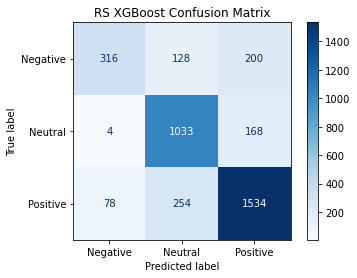

In [84]:
get_results(RS_xgb, 'RS XGBoost')

In [86]:
# original confusion matrix that was not tuned
conf_matrices[3]

array([[ 318,  134,  192],
       [   3, 1057,  145],
       [  71,  246, 1549]])

**Random Forest**

In [87]:
param_grid_rf = {
    'n_estimators' : [100, 150, 200], 
    'max_depth' : [80, 100, 120], 
    'min_samples_split' : [2, 4, 8], 
    'min_samples_leaf' : [3, 5, 7]
}

In [ ]:
rf = RandomForestClassifier()
RS_rf = RandomizedSearchCV(rf, param_grid_rf, n_iter= 20, scoring= 'accuracy', 
                          random_state= 27)
RS_rf.fit(tfidf_Xtrain, y_train)

In [ ]:
RS_rf.feature_importance_

In [ ]:
get_results(RS_rf, 'RS Random Forest')

**Support Vector Machines**

In [ ]:
svm.LinearSVC (setting multi_class=”crammer_singer”)